# Task 3

In [1]:
import cv2
import matplotlib.pyplot as plt

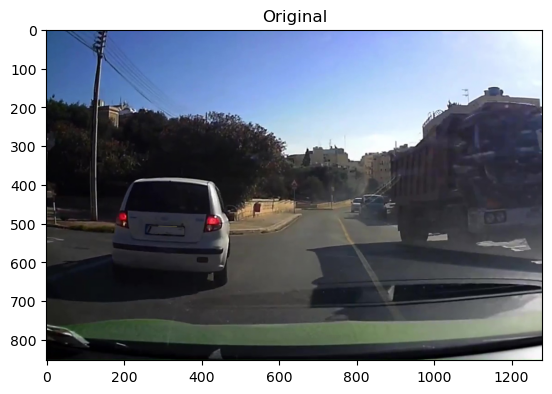

(1000, 666)


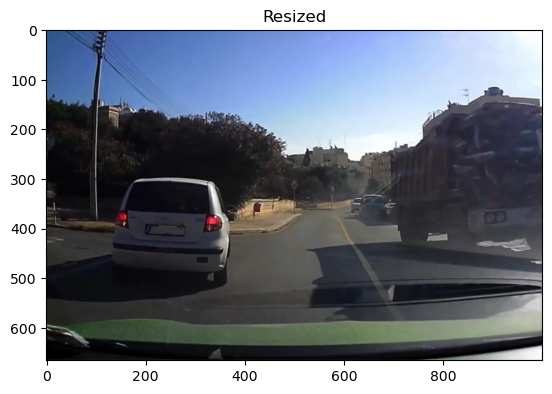

In [15]:
street = cv2.imread("./street1.jpg")
street = cv2.cvtColor(street, cv2.COLOR_BGR2RGB)

plt.imshow(street), plt.title('Original')
plt.show()

height = street.shape[0]
width = street.shape[1]

updatedWidth = 1000
ratio = updatedWidth / width
updatedHeight = int(height * ratio)

newDimensions = (updatedWidth, updatedHeight)

resized = cv2.resize(street, newDimensions, interpolation=cv2.INTER_LINEAR)
plt.imshow(resized), plt.title('Resized')
plt.show()

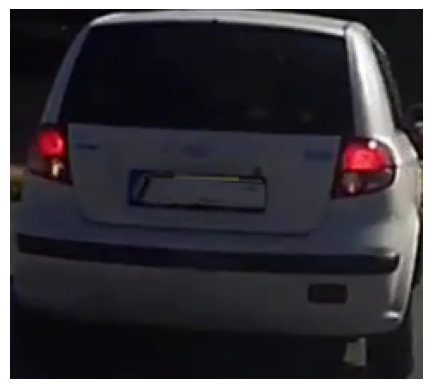

True

In [102]:
x, y, w, h = (0.251, 0.611, 0.240, 0.324)

xLeft = int(x*newDimensions[0] - w*newDimensions[0]/2)
xRight = int(x*newDimensions[0] + w*newDimensions[0]/2)
yLeft = int(y*newDimensions[1] - h*newDimensions[1]/2)
yRight = int(y*newDimensions[1] + h*newDimensions[1]/2)

croppedImage = resized[yLeft:yRight, xLeft:xRight]
plt.imshow(croppedImage), plt.axis('off')
plt.show()

croppedImage = cv2.cvtColor(croppedImage, cv2.COLOR_BGR2RGB)

cv2.imwrite('CroppedImage.jpg', croppedImage)

# Task 4

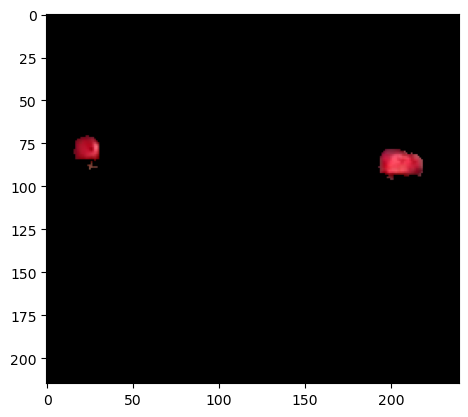

In [130]:
import numpy as np

croppedImage = cv2.cvtColor(croppedImage, cv2.COLOR_BGR2RGB)
croppedHSV = cv2.cvtColor(croppedImage, cv2.COLOR_RGB2HSV)

lower_bound = np.array([0, 100, 100], np.uint8)
upper_bound = np.array([10,255,255], np.uint8)
mask1 = cv2.inRange(croppedHSV, lower_bound, upper_bound)

lower_bound = np.array([160, 130, 100], np.uint8)
upper_bound = np.array([180,255,255], np.uint8)
mask2 = cv2.inRange(croppedHSV, lower_bound, upper_bound)

mask = mask1+mask2

result = cv2.bitwise_and(croppedImage, croppedImage, mask = mask)

plt.imshow(result)
plt.show()